# Hands On Session: Autoencoders, and Machine Learning
# By: Sabera Talukder

In [15]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import xarray as xr

# Load Data

In [17]:
elec_loc_path = '/home/sabra/Documents/Chen_Institute_DataSAI_for_Neuroscience/07_08_22_day4_autoencoders_and_ML_introduction/data/electrode_location_dictionary.npy'
elec_loc_dict_arr = np.load(elec_loc_path, allow_pickle=True)
elec_loc_dict = elec_loc_dict_arr.item()

#### Download Data for Pt2, Pt4, Pt5, Pt9 From Here:
#### https://figshare.com/articles/dataset/Naturalistic_ECoG_move_v_rest/13010546

In [18]:
# Once you have downloaded the 4 datasets from above, load the data for each day
base_path = '/home/sabra/Documents/Code/2022_new_year_new_code/ajile/htnet_data_figure_recreation/restart_5_12_22/original_data/'

In [19]:
pt2_data = xr.open_dataset(base_path + 'EC02_ecog_data.nc')
pt4_data = xr.open_dataset(base_path + 'EC04_ecog_data.nc')
pt5_data = xr.open_dataset(base_path + 'EC05_ecog_data.nc')
pt9_data = xr.open_dataset(base_path + 'EC09_ecog_data.nc')

In [20]:
pt2_data_arr

<xarray.DataArray (variable: 1, events: 418, channels: 87, time: 1001)>
array([[[[-4.02136767e+01, -3.10175046e+01, -3.26603618e+01, ...,
           3.26891724e+01,  4.32021032e+01,  4.83262824e+01],
         [ 2.63035709e+01,  2.33823601e+01,  1.73695946e+01, ...,
          -1.14567015e+01, -1.58533915e+01, -1.64409813e+01],
         [ 1.59567659e+01,  1.58659767e+01,  2.08064820e+01, ...,
          -2.91156370e+00, -3.76662929e+00, -3.45306851e+00],
         ...,
         [ 3.00584564e+01,  3.24535205e+01,  3.08364819e+01, ...,
          -1.50583747e+00, -2.20171817e-01,  9.29557098e-01],
         [ 2.85353949e+01,  3.26740057e+01,  2.86240065e+01, ...,
          -1.72348225e+00, -2.60869496e+00, -1.42590104e+00],
         [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
           1.00000000e+00,  1.00000000e+00,  1.00000000e+00]],

        [[-8.99164644e+01, -7.75396736e+01, -4.53792845e+01, ...,
           5.80474754e+00,  1.09347343e+01, -1.11029273e+01],
         [-9.40794356e+01, -5.64656800e+01, -2.40752674e+01, ...,
           2.48340156e+01,  3.89587377e+00, -5.75941464e+00],
         [-1.85426902e+01, -1.05153729e+01, -1.18137414e+01, ...,
           2.56273894e+01,  1.51417729e+01,  4.45735527e+00],
...
         [-8.45184018e+00, -8.91446209e+00, -8.45794038e+00, ...,
          -2.40102545e+01, -1.40118438e+01, -3.18753035e+00],
         [-1.12830876e+01, -1.00047292e+01, -1.03287013e+01, ...,
          -2.21206545e+01, -1.32745370e+01, -3.69659769e+00],
         [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
           2.00000000e+00,  2.00000000e+00,  2.00000000e+00]],

        [[ 3.08677164e+01,  3.88891958e+01,  3.62643388e+01, ...,
           3.32514687e+01,  1.65736133e+01, -1.80378114e+00],
         [ 3.73986241e+01,  4.47342570e+01,  4.44939724e+01, ...,
           5.62751529e+01,  4.50353898e+01,  3.85699495e+01],
         [ 2.38682181e+01,  2.60866420e+01,  3.72211481e+01, ...,
           4.14832188e+01,  3.07461480e+01,  3.30458068e+01],
         ...,
         [ 2.05781148e+00,  3.25724002e+00,  4.31606625e+00, ...,
          -9.79919095e-01, -8.30700315e+00, -4.89906421e+00],
         [ 3.11082518e+00,  2.85738305e+00,  4.97075139e+00, ...,
          -1.09900432e-01, -1.03542722e+01, -6.12251574e+00],
         [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
           2.00000000e+00,  2.00000000e+00,  2.00000000e+00]]]])
Coordinates:
  * time      (time) float64 -2.0 -1.996 -1.992 -1.988 ... 1.988 1.992 1.996 2.0
  * events    (events) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 6 6 6 6 6 6 6 6 6 6 6 6
  * channels  (channels) int32 0 1 2 3 4 5 6 7 8 ... 78 79 80 81 82 83 84 85 86
  * variable  (variable) <U29 '__xarray_dataarray_variable__'

In [21]:
pt2_data_arr = pt2_data.to_array()
pt4_data_arr = pt4_data.to_array()
pt5_data_arr = pt5_data.to_array()
pt9_data_arr = pt9_data.to_array()

In [22]:
# organized by events, channels (+ label I belive), time
print(pt2_data_arr.shape)
print(pt4_data_arr.shape)
print(pt5_data_arr.shape)
print(pt9_data_arr.shape)

(1, 418, 87, 1001)
(1, 536, 85, 1001)
(1, 406, 107, 1001)
(1, 302, 127, 1001)


# Visualize Data

<IPython.core.display.Javascript object>


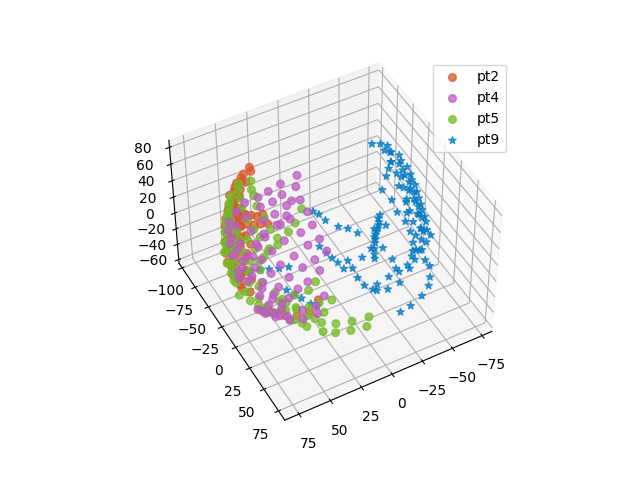

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [23]:
# Visualize the electrode data in 3d

%matplotlib notebook
ax = plt.axes(projection='3d')

colors = np.array([[216, 87, 42],
                   [187, 92, 193],
                   [115, 187, 37],
                   [6, 124, 196]])

for i, (key, value) in enumerate(elec_loc_dict.items()):
    if value[0] == 'R':
        m = 'o'
    elif value[0] == 'L':
        m ='*'    
    _ = ax.scatter3D(value[1][:, 0], value[1][:, 1], value[1][:, 2], c=colors[i]/255, alpha=0.75, s=30, marker=m)
    
_ = ax.legend(['pt2', 'pt4', 'pt5', 'pt9'])

In [ ]:
# rest = 1, move = 2

In [ ]:
# Borrowing Code From 5_12_22_delete_X%_elecs_from_test_day
# Investigate Steve email see if easy to put in x,y,z data too

## Load Data

In [ ]:
# Using data from this paper: https://iopscience.iop.org/article/10.1088/1741-2552/abda0b#jneabda0bs5
# Data can be found directly here or in the git repo: https://figshare.com/articles/dataset/Naturalistic_ECoG_move_v_rest/13010546

In [ ]:
base_path = '/home/sabra/Documents/Code/2022_new_year_new_code/ajile/htnet_data_figure_recreation/restart_5_12_22/original_data/'

In [ ]:
pt2_data = xr.open_dataset(base_path + 'EC02_ecog_data.nc')
pt4_data = xr.open_dataset(base_path + 'EC04_ecog_data.nc')
pt5_data = xr.open_dataset(base_path + 'EC05_ecog_data.nc')
pt9_data = xr.open_dataset(base_path + 'EC09_ecog_data.nc')

In [ ]:
pt2_data_arr = pt2_data.to_array()
pt4_data_arr = pt4_data.to_array()
pt5_data_arr = pt5_data.to_array()
pt9_data_arr = pt9_data.to_array()

In [ ]:
pt2_data

In [ ]:
# organized by events, channels (+ label I belive), time
print(pt2_data_arr.shape)
print(pt4_data_arr.shape)
print(pt5_data_arr.shape)
print(pt9_data_arr.shape)

# Try to load fif files